In [74]:
import pandas as pd
import numpy as np
import seaborn as sns 
from bs4 import BeautifulSoup 
from pandasql import sqldf
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
%matplotlib inline

FUNCTIONS CREATED 

In [75]:
# FUNCTION TO GET COLUMN NAMES 
def getcol(dfname):
    print(str(dfname.columns.values.tolist()))

NEW DATAFRAMES CREATED 

In [76]:
# Actorframe, data on actors from rotten tomatos, titles duplicate when they have multiple actors 
# Studioframe, data we have on studio production associated with movies, 
# data_on_numbers, no title duplicates newsest data in the flatiron provided data sorted by domestic gross
# the_df_to_merge_them_all largest collection of clean FlatIron data possible, focusing on numbers 
# mini_all smaller dataframe including all clean flatiron data being used to help find studios, but, the most easily editable
#          just change the columns listed before the .copy() creating the frame 

In [77]:
#dtypes
dfmxls_3_dtypes = {'Unnamed: 0':  int, 'tconst' :str , 'P_Cost':int , 'Dom_Gross':int , 
                   'Frgn_Gross':int, 'WW_Gross':int, 'Domestic Opening':int}
dfmxls_2_dtypes = {'Unnamed: 0':int, 'tconst':str, 'primaryTitle':str, 'startYear':int, 'runtimeMinutes':int, 'genres':str, 
                   'startYear_str':str, 'titleyear':str, 'studio_BOM':str, 'MPAA':str, 'rd': 'datetime64' , 'StudioDesc':str}
dfmxls_1_dtypes = {'Unnamed: 0':int, 'tconst':str, 'titleType':str, 'primaryTitle':str, 'originalTitle':str, 'startYear':int, 
                   'runtimeMinutes':int, 'genres':str, 'averageRating':float, 'numVotes':int, 'Splitgeneres':str}


dfcsv_1_dtype = {'title':str, 'studio':str, 'foreign_gross':str, 'year':str}
dfcsv_2_dtype = {'nconst':str, 'primary_name':str, 'birth_year':str, 'death_year':str, 'primary_profession':str, 
                 'known_for_titles':str}
dfcsv_3_dtype = {'title_id':str, 'ordering':int, 'title':str, 'region':str, 'language':str, 'types':str, 'attributes':str, 
                 'is_original_title':str}
dfcsv_4_dtype = {'tconst':str, 'primary_title':str, 'original_title':str, 'start_year':str, 'genres':str}
dfcsv_5_dtype = {'tconst':str, 'directors':str, 'writers':str}
dfcsv_6_dtype = {'tconst':str, 'ordering':int, 'nconst':str, 'category':str, 'job':str, 'characters':str}
dfcsv_7_dtype = {'tconst':str, 'averagerating':float, 'numvotes':int}
dfcsv_8_dtype = {'Unnamed: 0':int, 'genre_ids':str, 'id':int, 'original_language':str, 'original_title':str, 
                 'popularity':float, 'release_date': str, 'title':str, 'vote_average':float, 'vote_count':int}



In [78]:
#CSV files, named dataframe, type & corresponding index to help differentiate without making long unique names
# file names optimized for shift tabing  
dfcsv_1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz', dtype=dfcsv_1_dtype)
dfcsv_2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz', dtype=dfcsv_2_dtype)
dfcsv_3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz', dtype=dfcsv_3_dtype)
dfcsv_4 = pd.read_csv('zippedData/imdb.title.basics.csv.gz',dtype=dfcsv_4_dtype)
dfcsv_5 = pd.read_csv('zippedData/imdb.title.crew.csv.gz', dtype=dfcsv_5_dtype)
dfcsv_6 = pd.read_csv('zippedData/imdb.title.principals.csv.gz', dtype=dfcsv_6_dtype)
dfcsv_7 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', dtype=dfcsv_7_dtype)
dfcsv_8 = pd.read_csv('zippedData/tmdb.movies.csv.gz', dtype=dfcsv_8_dtype)

In [79]:
#TSV FILES, named dataframe, file type & corresponding index to help differentiate without making long unique names
dftsv_1= pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t',encoding='utf-8')
dftsv_2 = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t',encoding='unicode_escape')

In [80]:
#WEBSCRAPED DATA, named dataframe, file type & corresponding index to help differentiate without making long unique names
dfxls_1 = pd.read_excel('zippedData/df_IMDB_Akas_english.xlsx')
dfxls_2 = pd.read_excel('zippedData/df_MasterFinancials.xlsx')
dfxls_3 = pd.read_excel('zippedData/Golden_Globes.xlsx')

In [81]:
#RUSS MASTER DATA, named dataframe, master, file type & corresponding index to help differentiate without making long names
dfmxls_1 = pd.read_excel('zippedData/df_Generes_With_tconst.xlsx')
dfmxls_2 = pd.read_excel('zippedData/df_IMDB_MovieCatalog.xlsx')
dfmxls_3 = pd.read_excel('zippedData/df_Movie_Financials.xlsx',  dtype = dfmxls_3_dtypes)

NAMES OF COLUMNS AND WHERE THEY'RE LOCATED

In [9]:
#    TSV COLUMNS FROM FLATIRON 
#dftsv_1 'id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 
#        'box_office', 'runtime', 'studio'
#dftsv_2 'id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date'

In [10]:
#    CLEANED COLUMNS FROM ORIGINAL 10 FILES PROVIDED, ALL OF THE FLATIRON MATERIALS 
#clean1 'title', 'studio', 'foreign_gross', 'year'     INCONSISTENT DENOMINATIONS FOR FOREIGN GROSS, USE WEBSCRAPED DATA 
#clean2 'nconst', 'primary_name', 'primary_profession', 'known_for_titles'
#clean3 'title_id', 'ordering', 'title', 'region', 'is_original_title'
#clean4 'tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres'
#clean5 'tconst', 'directors', 'writers'
#clean6 'tconst', 'ordering', 'nconst', 'category'
#clean7 'tconst', 'averagerating', 'numvotes'
#clean8 'genre_ids', 'id', 'original_language', 'original_title', 'release_date', 'title', 'vote_average', 'vote_count'

#clean9 'id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date'
#clean10 'id', 'synopsis', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio'

In [11]:
# XLS COLUMNS, FIRST 2 ARE NO LONGER IN USE 
#dfxls_3 'Year', 'Drama', 'Musical/Comedy', 'Drama Actor', 'Drama Actor Movie ', 'Musical/Comedy Actor', 
#        'Musical/Comedy Actor Movie ', 'Drama Actress', 'Drama Actress Movie ', 'Musical/Comedy Actress',
#        'Musical/Comedy Actress Movie',  'Director', 'Director Movie '

In [12]:
dftsv_1['rating'] = dftsv_1['rating'].rename('parent_rating', inplace=True) #name slightly misleading 

#keeping non-numeric columns with few NaN values so we could still use 
#to groupby or search from, can always drop later subbing for unknown 
#so we don't get and NaN errors 

clean1 = dfcsv_1.fillna(dfcsv_1['domestic_gross'].mean())
clean2 = dfcsv_2.drop(labels='birth_year', axis=1).drop(labels='death_year', axis=1).fillna('unknown')
clean3 = dfcsv_3.drop(labels='attributes', axis=1).drop(labels='language', axis=1).drop(labels='types', axis=1).fillna('unknown')
clean4 = dfcsv_4.fillna(dfcsv_4['runtime_minutes'].median()).fillna('unknown')
clean5 = dfcsv_5.fillna('unknown')
clean6 = dfcsv_6.drop(labels='job', axis=1).drop(labels='characters', axis=1)
clean7 = dfcsv_7
#numvotes range wildly making votes less accurate if not sorted to be in certain thresholds 
clean8 = dfcsv_8.drop(labels='Unnamed: 0', axis=1).drop(labels='popularity', axis=1)
#columns full but useless 
clean9 = dftsv_2.drop(labels='rating', axis=1).fillna('unknown')
#rating probably not worth trying to add, would have to convert a lot to determine mean/med/mode
#review subbed for unknown so we could still use to search 
clean10 = dftsv_1 #Really short but lots of data, join on left & right in sep DF w/clean1 

In [13]:
rottendata = pd.read_csv('zippedData/all_movie.csv')
rottenrevkag = pd.read_csv('zippedData/rotten_tomatoes_reviews.csv')
rottenmovkag = pd.read_csv('zippedData/rotten_tomatoes_movies.csv')
box_vs_rate = clean9.merge(clean10, how='inner', on='id')
full_rotten = box_vs_rate.merge(rottendata, how='inner', left_on='synopsis', right_on='Description')

#movies with reveiws over 5.0 - box office, runtime, studio?
#movies with reveiws under 5.0 - box office, runtime, studio?

hrating = full_rotten.loc[full_rotten['fresh'] == 'fresh'].copy()
lrating = full_rotten[full_rotten['fresh'] == 'rotten'].copy()

In [14]:
#can't seem to merge this with any other data, says can't assign 9.9gib, when trying to specify datatypes to save space went up to 12.2 :(
#gottaclean = rottenmovkag.merge(rottenrevkag,how='outer', on='rotten_tomatoes_link')
#cleanin_up = gottaclean.drop(labels='review_date', axis=1).drop(labels='critic_publication', axis=1).drop(labels='critic_icon', axis=1)
#cleaninup = cleanin_up.drop(labels='critic_top', axis=1).drop(labels='critic_score', axis=1).drop(labels='review_content', axis=1)
#cleanup = cleaninup.drop(labels='rotten_tomatoes_link', axis=1).drop(labels='poster_image_url', axis=1).drop(labels='critics_consensus', axis=1)

In [15]:
box_vs_rate = clean9.merge(clean10, how='inner', on='id')
#lil_rotten = box_vs_rate.merge(rottendata, how='inner', left_on='synopsis', right_on='Description')
#full_rotten = lil_rotten.merge(cleanup, how='inner', left_on='Title', right_on='movie_title')

In [16]:
checking_titles = clean1.merge(clean3, how='inner', on='title', indicator='title2').merge(clean8, how='inner', on='title', indicator='title3')
# USING INDICATOR TO SEE IF VALUES MATCH ON BOTH SIDES, GOT ONE RESULT 'BOTH' FOR BOTH
# ALL 8 STARTING CSV 'TITLE' COLUMNS MATCH UP 

In [17]:
#playing around to find the largest dataframe that could help connect everything, think sql is going to be a better move 
the_df_to_merge_them_all = clean1.merge(clean3, how='outer', on='title').merge(clean8,  how='outer', on='title').merge(clean4,  how='outer', on='original_title').merge(clean5, how='outer', on='tconst').merge(clean6, how='outer', on='tconst').merge(clean7, how='outer', on='tconst').merge(clean2, how='outer', on='nconst')
the_df_to_merge_them_all = the_df_to_merge_them_all.sort_values(by='title_id', ascending=False)

mini_all = the_df_to_merge_them_all[['title', 'studio', 'year', 'original_language','original_title', 'release_date', 'vote_average', 'vote_count', 'runtime_minutes', 'genres', 'directors', 'writers', 'id', 'tconst']].dropna().copy()
mini_all = mini_all.merge(clean9, how='inner', on='id')

In [18]:
rotten1 = full_rotten.merge(clean9, on='id')

rotten1['id'].fillna(0, inplace=True)
clean10['id'].fillna(0, inplace=True)
clean8noid = clean8.drop(labels='id', axis=1)

rotten2 = rotten1.merge(clean10, how='outer', on='id')

criticrev = rotten1.loc[rotten1['fresh_y'] == 'fresh'].copy()
crticcounts = criticrev['Genre'].value_counts()
criticgenres = crticcounts.to_frame()

fresh_count = rotten1[['publisher_y', 'fresh_y']].sort_values(by='publisher_y').dropna().copy().reset_index().drop('index', axis=1)
fresh_count = fresh_count[fresh_count != 'NaN'] 

In [19]:
criticsgrp = fresh_count.groupby(['publisher_y','fresh_y']).size()
criticsgrp = criticsgrp.to_frame(name='vs')
criticsgrp = criticsgrp.drop(labels='unknown', axis=0)

cgroup = fresh_count.groupby(['publisher_y']).size()
cgroup = cgroup.to_frame(name='vs')
cgroup = cgroup.drop(labels='unknown', axis=0)

# MOST REVIEWS POSTED

manyreviews = cgroup.sort_values(by='vs', ascending=False).head(100)
manyreviews = manyreviews.reset_index()

In [20]:
genre_ratings = rotten1[['publisher_y', 'Genre', 'fresh_y']].sort_values(by='publisher_y').dropna().copy().reset_index().drop('index', axis=1)
generes_sum = genre_ratings.groupby(['publisher_y', 'Genre'])['Genre'].count().to_frame(name='generes_sum')
generes_sum = generes_sum.drop(labels='unknown')
generes_sum = generes_sum.reset_index()

In [21]:
fresh_sum = genre_ratings.groupby(['publisher_y', 'Genre', 'fresh_y'])['fresh_y'].count().to_frame()
fresh_sum['fresh'] = fresh_sum['fresh_y']
fresh_sum = fresh_sum.drop(columns='fresh_y')
fresh_sum = fresh_sum.reset_index()
notsofresh = fresh_sum[ fresh_sum['fresh_y'] == 'rotten' ].index 
fresh_sum.drop(notsofresh, inplace = True) 

In [22]:
pubsgeneres = fresh_sum.merge(generes_sum)
pubsgeneres['% Positive'] = pubsgeneres['fresh']/pubsgeneres['generes_sum'] *100

In [23]:
pubsgeneres

,publisher_y,Genre,fresh_y,fresh,generes_sum,% Positive
0,2UE That Movie Show,Action,fresh,687,687,100.000000
1,2UE That Movie Show,Comedy,fresh,806,968,83.264463
2,2UE That Movie Show,Drama,fresh,1676,1676,100.000000
3,2UE That Movie Show,Horror,fresh,182,182,100.000000
4,2UE That Movie Show,Kids&Family,fresh,182,182,100.000000
...,...,...,...,...,...,...
6473,www.susangranger.com,Drama,fresh,1270,2578,49.262995
6474,www.susangranger.com,Kids&Family,fresh,466,624,74.679487
6475,www.susangranger.com,Mystery,fresh,525,882,59.523810
6476,www.susangranger.com,Romance,fresh,541,923,58.613218


In [24]:
pubsgeneres = pubsgeneres.drop('fresh', axis=1)
pubsgeneres = pubsgeneres.drop('fresh_y', axis=1)
pubsgeneres['generes_sum'] = pubsgeneres['generes_sum']/100
pubsgeneres['Total_Reviews'] = pubsgeneres['generes_sum'] 
pubsgeneres = pubsgeneres.set_index('publisher_y')
pubsgeneres.drop('generes_sum', axis=1, inplace=True)

In [30]:
ActionCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Action'].sort_values(by='Total_Reviews', ascending=False).head(25)
ArtnForeignCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Art&Foreign'].sort_values(by='Total_Reviews', ascending=False).head(25)
ClassicsCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Classics'].sort_values(by='Total_Reviews', ascending=False).head(25)
ComedyCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Comedy'].sort_values(by='Total_Reviews', ascending=False).head(25)
DocumentaryCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Documentary'].sort_values(by='Total_Reviews', ascending=False).head(25)
DramaCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Art&Foreign'].sort_values(by='Total_Reviews', ascending=False).head(25)
KidsnFamilyCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Kids&Family'].sort_values(by='Total_Reviews', ascending=False).head(25)
MysteryCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Mystery'].sort_values(by='Total_Reviews', ascending=False).head(25)
RomanceCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'Romance'].sort_values(by='Total_Reviews', ascending=False).head(25)
SciFiCrit = pubsgeneres.loc[pubsgeneres['Genre'] == 'SciFi'].sort_values(by='Total_Reviews', ascending=False).head(25)
DocumentaryCrit['Total_Reviews'] = DocumentaryCrit['Total_Reviews']*10

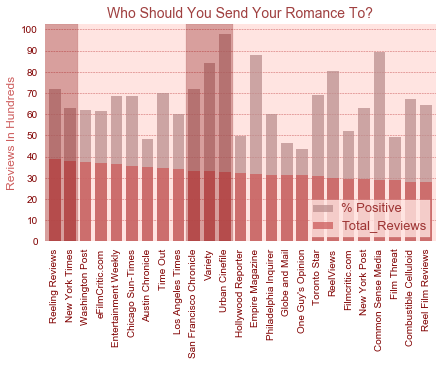

In [31]:
mpl.style.use('seaborn') 
romanceplot = RomanceCrit['% Positive'].plot(kind='bar', figsize=(7,4), color='rosybrown', width=.75, alpha=.75, legend=True)
romance2plot = RomanceCrit['Total_Reviews'].plot(kind='bar', figsize=(7, 4), position=.5, width=.75, alpha=.75, stacked=True, color='indianred',legend=True, ax=romanceplot)


x = np.linspace(0, 1*np.pi, 100)
y = np.sin(x)

romanceplot.set_title('Who Should You Send Your Romance To?'.format('seaborn'), color='maroon', fontsize=14, alpha=.75)
#dramaplot.set_xlabel(xlabel='Major Critic Publications' .format('seaborn'), color='maroon', fontsize=12)
romanceplot.set_xlabel(xlabel=' ')
romanceplot.set_yticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
romanceplot.set_ylabel(ylabel='Reviews In Hundreds'.format('seaborn'), color='indianred', fontsize=12)
romanceplot.set_facecolor(color='mistyrose')
romanceplot.axes.yaxis.grid(b=True, which='Both', color='indianred', linestyle='dashed', linewidth=.5)
romanceplot.axes.xaxis.grid(b=False)

romanceplot.tick_params(axis='x', colors='maroon')
romanceplot.tick_params(axis='y', colors='maroon')

leg = romanceplot.legend(framealpha = 0, loc = 'lower right')
for text in leg.get_texts():
    plt.setp(text, color = 'maroon', fontsize=13, alpha=.75)
    
romanceplot.axvspan(xmin=-1, xmax=1.5,ymin=0.0,ymax=1, color='maroon', alpha=0.3)
romanceplot.axvspan(xmin=8.5, xmax=11.5,ymin=0.0,ymax=1, color='maroon', alpha=0.3)
romanceplot.axvspan(xmin=16.5, xmax=24.25,ymin=0.02,ymax=.19, color='mistyrose', alpha=0.8)

plt.show()

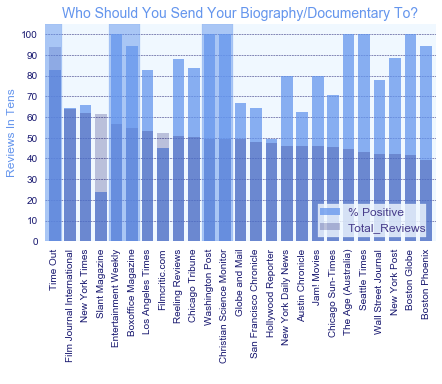

In [32]:
mpl.style.use('seaborn') 
bioplot = DocumentaryCrit['% Positive'].plot(kind='bar', figsize=(7,4), color='cornflowerblue', width=.75, 
                                             alpha=.75, legend=True)

bio2plot = DocumentaryCrit['Total_Reviews'].plot(kind='bar', figsize=(7, 4), position=.5, width=.75, 
                                             alpha=.25, stacked=True, color='midnightblue',legend=True, ax=bioplot)


x = np.linspace(0, 1*np.pi, 100)
y = np.sin(x)

bioplot.set_title('Who Should You Send Your Biography/Documentary To?'.format('seaborn'), color='cornflowerblue', fontsize=14)
#dramaplot.set_xlabel(xlabel='Major Critic Publications' .format('seaborn'), color='maroon', fontsize=12)
bioplot.set_xlabel(xlabel=' ')
bioplot.set_yticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
bioplot.set_ylabel(ylabel='Reviews In Tens'.format('seaborn'), color='cornflowerblue', fontsize=12)
bioplot.set_facecolor(color='aliceblue')
bioplot.axes.yaxis.grid(b=True, which='Both', color='midnightblue', linestyle='dashed', linewidth=.5)
bioplot.axes.xaxis.grid(b=False)

bioplot.tick_params(axis='x', colors='midnightblue')
bioplot.tick_params(axis='y', colors='midnightblue')

leg = bioplot.legend(framealpha = 0, loc = 'lower right')
for text in leg.get_texts():
    plt.setp(text, color = 'darkslateblue', fontsize=12, alpha=1)
    
bioplot.axvspan(xmin=-1, xmax=.5,ymin=0.0,ymax=1, color='cornflowerblue', alpha=0.5)
bioplot.axvspan(xmin=3.5, xmax=5.5,ymin=0.0,ymax=1, color='cornflowerblue', alpha=0.5)
bioplot.axvspan(xmin=9.5, xmax=11.5,ymin=0.0,ymax=1, color='cornflowerblue', alpha=0.5)
bioplot.axvspan(xmin=17, xmax=24,ymin=0.02,ymax=.17, color='aliceblue', alpha=0.8)


plt.show()

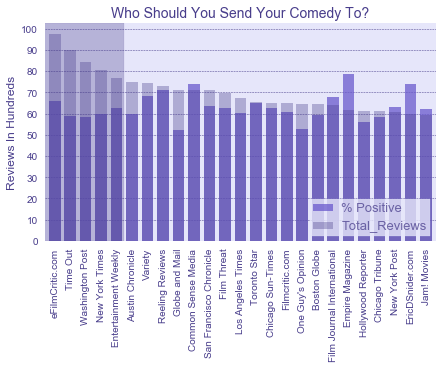

In [33]:
mpl.style.use('seaborn') 
comedyplot = ComedyCrit['% Positive'].plot(kind='bar', figsize=(7,4), color='slateblue', width=.75, alpha=.75, legend=True)
comedy2plot = ComedyCrit['Total_Reviews'].plot(kind='bar', figsize=(7, 4), position=.5, width=.75, stacked=True, color='darkslateblue',alpha=.35, legend=True, ax=comedyplot)


x = np.linspace(0, 1*np.pi, 100)
y = np.sin(x)

comedyplot.set_title('Who Should You Send Your Comedy To?'.format('seaborn'), color='darkslateblue', fontsize=14)
#dramaplot.set_xlabel(xlabel='Major Critic Publications' .format('seaborn'), color='maroon', fontsize=12)
comedyplot.set_xlabel(xlabel=' ')
comedyplot.set_yticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
comedyplot.set_ylabel(ylabel='Reviews In Hundreds'.format('seaborn'), color='darkslateblue', fontsize=12)
comedyplot.set_facecolor(color='lavender')
comedyplot.axes.yaxis.grid(b=True, which='Both', color='darkslateblue', linestyle='dashed', linewidth=.5, alpha=1)
comedyplot.axes.xaxis.grid(b=False)

comedyplot.tick_params(axis='x', colors='darkslateblue')
comedyplot.tick_params(axis='y', colors='darkslateblue')

leg = comedyplot.legend(framealpha = 0, loc = 'lower right')
for text in leg.get_texts():
    plt.setp(text, color = 'darkslateblue', fontsize=13, alpha=.75)
    
comedyplot.axvspan(xmin=-1, xmax=4.5, color='darkslateblue', alpha=0.3)
comedyplot.axvspan(xmin=16.5, xmax=24.25,ymin=0.02,ymax=.19, color='lavender', alpha=0.8)

plt.show()

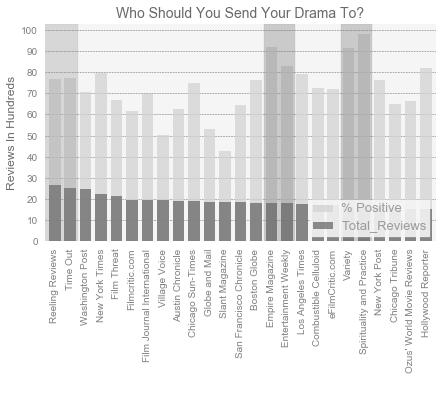

In [34]:
mpl.style.use('seaborn') 
dramaplot = DramaCrit['% Positive'].plot(kind='bar', figsize=(7,4), color='lightgrey', width=.75, alpha=.75, legend=True)
drama2plot = DramaCrit['Total_Reviews'].plot(kind='bar', figsize=(7, 4), position=.5, width=.75, alpha=.75, stacked=True, color='dimgray',legend=True, ax=dramaplot)


x = np.linspace(0, 1*np.pi, 100)
y = np.sin(x)

dramaplot.set_title('Who Should You Send Your Drama To?'.format('seaborn'), color='dimgrey', fontsize=14)
#dramaplot.set_xlabel(xlabel='Major Critic Publications' .format('seaborn'), color='maroon', fontsize=12)
dramaplot.set_xlabel(xlabel=' ')
dramaplot.set_yticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
dramaplot.set_ylabel(ylabel='Reviews In Hundreds'.format('seaborn'), color='dimgrey', fontsize=12)
dramaplot.set_facecolor(color='whitesmoke')
dramaplot.axes.yaxis.grid(b=True, which='Both', color='dimgrey', linestyle='dashed', linewidth=.5)
dramaplot.axes.xaxis.grid(b=False)

dramaplot.tick_params(axis='x', colors='grey')
dramaplot.tick_params(axis='y', colors='grey')

leg = dramaplot.legend(framealpha = 0, loc = 'lower right')
for text in leg.get_texts():
    plt.setp(text, color = 'grey', fontsize=13, alpha=.75)
    
dramaplot.axvspan(xmin=-1, xmax=1.5,ymin=0.0,ymax=1, color='gray', alpha=0.25)

dramaplot.axvspan(xmin=18.5, xmax=20.5,ymin=0.0,ymax=1, color='dimgrey', alpha=0.3)
dramaplot.axvspan(xmin=13.5, xmax=15.5,ymin=0.0,ymax=1, color='dimgrey', alpha=0.3)
dramaplot.axvspan(xmin=16.5, xmax=24.25,ymin=0.02,ymax=.19, color='whitesmoke', alpha=0.9)


plt.show()

In [69]:
l = 0 

Genres = []

for genre in generes_sum['Genre']:
    Genres.append(generes_sum['Genre'][l])
    l += 1 
    
Genres = set(Genres)

In [37]:
i = 0 
j = 0 

top50_pubs = []

for critic in manyreviews['publisher_y']:
    top50_pubs.append(manyreviews['publisher_y'][i])
    i += 1 
    

fresh = {}
rotten = {}

for critic in top50_pubs:
    fresh.update({ j : int(str(criticsgrp.loc[top50_pubs[j]].iloc[0]).split(' ')[4].strip('\nName:'))})
    rotten.update({ j : int(str(criticsgrp.loc[top50_pubs[j]].iloc[1]).split(' ')[4].strip('\nName:'))})
    j += 1     

freshdf = pd.DataFrame(fresh.values(), columns=['fresh'])
rottendf = pd.DataFrame(fresh.values(), columns=['fresh'])

In [38]:
criticbreakdown = manyreviews.merge(freshdf, left_index=True, right_index=True).copy()
criticbreakdown['rotten'] = criticbreakdown['vs'] - criticbreakdown['fresh'] 
criticbreakdown.rename(columns={'vs' : 'total'}, inplace=True)

criticbreakdown = criticbreakdown.sort_values(by='total', ascending=False).reset_index()
criticbreakdown['most_reviews'] = criticbreakdown['index']#.rename('most_reviews')

criticbreakdown['%_positive'] = criticbreakdown['fresh'] / criticbreakdown['total'] *100
criticbreakdown['%_negative'] = criticbreakdown['rotten'] / criticbreakdown['total'] *100

criticbreakdown.drop(labels='index', axis=1, inplace=True)

In [55]:
c = criticbreakdown.sort_values(by='most_reviews', ascending=True).head(50)
c['fresh'] = c['fresh']/1000
c['rotten'] = c['rotten']/1000
cc = c[['fresh', 'rotten', 'publisher_y']]
ccc = c[['publisher_y', '%_positive']]
#c = c.sort_values(by='most_reviews', ascending=False).head(5)
criticongenre = criticbreakdown.merge(generes_sum)

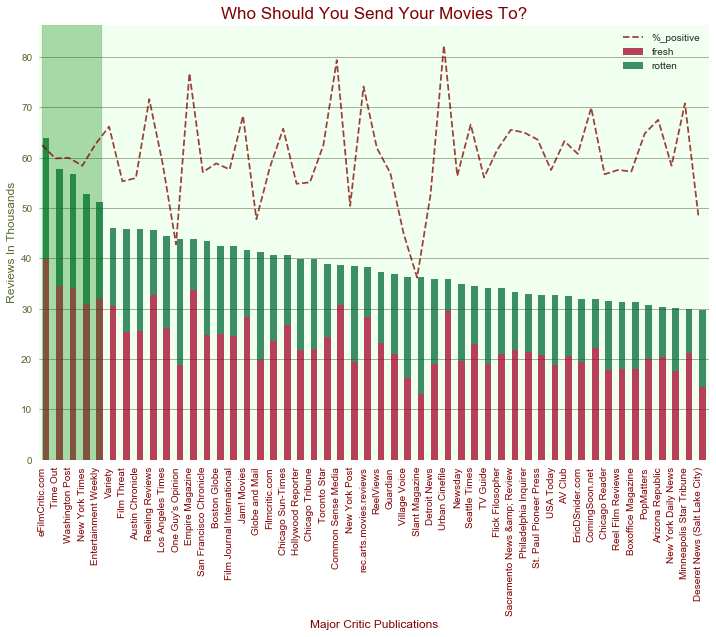

In [58]:
mpl.style.use('seaborn') 
ccplot = ccc.plot(kind='line',  x='publisher_y', figsize=(12,8), color='maroon', linestyle='dashed', linewidth=1.75, alpha=.75)
cplot = cc.plot(kind='bar', x='publisher_y', figsize=(12,8), position=-0.1, stacked=True, colormap='RdYlGn', ax=ccplot, alpha=.75)


x = np.linspace(0, 1*np.pi, 100)
y = np.sin(x)

cplot.plot(x, y, 'k-', lw=0)
cplot.axvspan(0.0, 4.5, color='g', alpha=0.3)

#mask = (x > 2.5) & (x < 3.0)
#cplot.plot(x[mask], y[mask], 'r-', lw=2.5)


cplot.set_title('Who Should You Send Your Movies To?'.format('seaborn'), color='maroon', fontsize=17)
cplot.set_xlabel(xlabel='Major Critic Publications' .format('seaborn'), color='maroon', fontsize=12)
#cplot.set_xticks(ticks[])
cplot.set_ylabel(ylabel='Reviews In Thousands'.format('seaborn'), color='darkolivegreen', fontsize=12)
cplot.set_facecolor(color='honeydew')
cplot.axes.yaxis.grid(b=True, which='Both', color='darkolivegreen', linestyle='-', linewidth=.5)
cplot.axes.xaxis.grid(b=False)

cplot.spines['bottom'].set_color('red')
cplot.spines['top'].set_color('red')

cplot.tick_params(axis='x', colors='maroon')
cplot.tick_params(axis='y', colors='darkolivegreen')

plt.show()

In [35]:
bestdramas = []
bestmusicalsncomedies = []
bestdirected = []
k = 0 

for row in dfxls_3:
    bestdramas.append(dfxls_3['Drama'][k])
    bestmusicalsncomedies.append(dfxls_3['Musical/Comedy'][k])
    bestdirected.append(dfxls_3['Director Movie '][k])
    k += 1 

In [36]:
merged =  dfmxls_1.merge(dfmxls_3, on='tconst', how='inner')
merged['ROI'] = merged['WW_Gross']/merged['P_Cost']*100-100
top50pop = merged.sort_values(by='numVotes', ascending=False).drop_duplicates(subset='primaryTitle').head(50)

reveiws = rotten1.drop_duplicates(subset='review_y')
mostpopROI = top50pop[['primaryTitle', 'startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'P_Cost', 'WW_Gross', 'ROI' ]]

In [37]:
#Golden Globe Winners 
GGwinners = pd.read_excel('zippedData/GGwinners.xlsx')
GGdf = GGwinners[['primaryTitle', 'startYear', 'runtimeMinutes', 'averageRating', 'WW_Gross', 'P_Cost']].copy()
GGdf['ROI'] = GGdf['WW_Gross']/GGdf['P_Cost']*100-100
GGdf = GGdf.sort_values(by='startYear', ascending=False)

#Oscar Winners 
Owinners = pd.read_excel('zippedData/Oscars.xlsx')
Odf = Owinners[['primaryTitle', 'startYear', 'runtimeMinutes', 'averageRating', 'WW_Gross', 'P_Cost']].copy()
Odf['ROI'] = Odf['WW_Gross']/Odf['P_Cost']*100-100
Odf = Odf.sort_values(by='startYear', ascending=False)

#Winners of both awards 
bothwins = pd.read_excel('zippedData/Both_Awards.xlsx')
BWdf = bothwins[['primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes', 'averageRating', 'WW_Gross', 'P_Cost', 'TOMATOMETER', 'CRITIC TOTAL ', 'AUDIENCE SCORE' ,'AUDIENCE TOTAL ', 'genres']].copy()
BWdf['ROI'] = BWdf['WW_Gross']/BWdf['P_Cost']*100-100
to_merge = BWdf.sort_values(by='startYear', ascending=False)

In [38]:
reveiwsofawardwinners = to_merge.merge(full_rotten, left_on='originalTitle', right_on='Title')
reveiwsofawardwinners = reveiwsofawardwinners[['Title', 'averageRating', 'ROI', 'review', 'fresh', 'critic', 'publisher', 'studio', 'Genre', 'Year']].copy()

In [39]:
mergeda = merged.loc[merged['averageRating'] >= 8.0]
mergedb = merged.loc[merged['numVotes'] >= 8.595700e+04]
mergedc = merged.loc[merged['Splitgeneres'] == 'Drama']
mergedd = merged.loc[merged['Splitgeneres'] == 'Comedy']
mergede = merged.loc[merged['Splitgeneres'] == 'Biography']
mergedf = merged.loc[merged['Splitgeneres'] == 'Adventure']
mergedg = merged.loc[merged['Splitgeneres'] == 'Romance']

In [40]:
couldwin = mergeda.append(mergedb).append(mergedc).append(mergedd).append(mergede).append(mergedf).append(mergedg)
#couldwin = couldwin.sort_values('Splitgeneres', inplace=True)

In [41]:
awardgenres = {'Drama' : 30, 'War' :2 , 'Biography': 6, 'Music' : 2, 'Comedy' : 12, 'Crime': 5, 'Action':2, 'Adventure':5, 'Thriller':5, 'History':3, 'Fantasy':3, 'Romance':4, 'Mystery':1, 'Musical':2, 'Sci-Fi':3, 'Horror':1, 'Family':1}
awardgenresdf = pd.DataFrame.from_dict(awardgenres, orient='index')
awardgenresdf = awardgenresdf.sort_index()
awardgenresdf[0] = awardgenresdf[0] * 1.25
awardgenresdf.reset_index(inplace=True)

In [42]:
couldwin.head()

,Unnamed: 0_x,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Splitgeneres,Unnamed: 0_y,P_Cost,Dom_Gross,Frgn_Gross,WW_Gross,Domestic Opening,ROI
126,298,tt0352248,movie,Cinderella Man,Cinderella Man,2005,144,"Biography,Drama,History",8.0,173775,Biography,42,88000000,61649911,46890000,108539911,18320205,23.340808
127,298,tt0352248,movie,Cinderella Man,Cinderella Man,2005,144,"Biography,Drama,History",8.0,173775,Drama,42,88000000,61649911,46890000,108539911,18320205,23.340808
128,298,tt0352248,movie,Cinderella Man,Cinderella Man,2005,144,"Biography,Drama,History",8.0,173775,History,42,88000000,61649911,46890000,108539911,18320205,23.340808
175,351,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,2009,153,"Adventure,Drama,War",8.3,1233881,Adventure,57,70000000,120540719,200914970,321455689,38054676,359.222413
176,351,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,2009,153,"Adventure,Drama,War",8.3,1233881,Drama,57,70000000,120540719,200914970,321455689,38054676,359.222413


In [43]:
#merged = merged.count().copy()
#merged = merged.sort_index(inplace=True)
#merged.hist()
ratedgenre = couldwin['Splitgeneres'].value_counts().to_frame()
ratedgenre.reset_index(inplace=True)
ratedgenre.sort_values(by='index', inplace=True)
ratedgenre['Popular'] = ratedgenre['Splitgeneres'] * 90 / 10000
ratedgenre['Popular'] = ratedgenre['Popular'].round()

In [44]:
#sns.catplot(x='index', y='Popular', kind = 'bar', data=ratedgenre, height=10, aspect=2)

In [45]:
#sns.catplot(x='index', y=0, kind = 'bar', data=awardgenresdf, height=10, aspect=2)

In [46]:
awardsvspop = awardgenresdf.merge(ratedgenre, on='index', how='inner')
awardsvspop.drop('Splitgeneres',axis=1, inplace=True)

In [47]:
awardsvspop['Awarded'] = awardsvspop[0]
awardsvspop.drop(0, axis=1, inplace=True)

In [48]:
#awardsvspop.plot(kind='bar', x='index' )

In [49]:
couldcounts = couldwin['Splitgeneres'].value_counts()
mightwincounts = couldcounts.to_frame()
mightwincounts['Predicted'] = mightwincounts['Splitgeneres'] *90 / 10000

In [50]:
mightwincounts.drop('Splitgeneres', axis=1, inplace =True)
mightwincounts.reset_index(inplace=True)

In [51]:
pop = merged.loc[merged['averageRating'] >= 5.0]
popular = pop['Splitgeneres'].value_counts().to_frame()
popular.reset_index(inplace=True)
popular.sort_values(by='index', inplace=True)
popular['Popular'] = popular['Splitgeneres'] * 77 / 10000

In [52]:
winnin = mightwincounts.merge(awardsvspop, on='index')
winning = winnin.merge(popular, on='index')

In [53]:
# Renaming a bucnh of columns 
criticgenres.loc['Family'] = criticgenres.loc['Kids&Family']#.rename('Family', inplace=True)
criticgenres.loc['Biography'] = criticgenres.loc['Documentary']#.rename('Biography', inplace=True)
criticgenres.loc['Sci-Fi'] = criticgenres.loc['SciFi']#.rename('Sci-Fi', inplace=True)
criticgenres.loc['History'] = criticgenres.loc['Classics']#.rename('History', inplace=True)

In [54]:
criticgenres.reset_index(inplace=True)
criticgenres['Critically Acclaimed'] = criticgenres['Genre'] / 50500
criticgenres = criticgenres.round(0)
winning = winning.merge(criticgenres)

In [55]:
# Want all values to be scaled to be out of 100 for easy comparisons 
winning['Awarded'] = winning['Awarded']*1.25
winning['Predicted'] = winning['Predicted']*1.25
winning['Fan Favorites'] = winning['Popular_y']*1.33
winning['Critically Acclaimed'] = winning['Critically Acclaimed']*1.15

# Getting rid of things not currently in use, may come back to them later 
winning = winning.drop('Genre', axis=1)
winning = winning.drop('Popular_x', axis=1)
winning = winning.drop('Splitgeneres', axis=1)
winning = winning.drop('Popular_y', axis=1)
winning = winning.drop('Fan Favorites', axis=1)

winning.set_index('index', inplace=True)

In [56]:
differences = winning['Awarded']-winning['Critically Acclaimed']
difference = winning['Awarded']-winning['Predicted']

In [57]:
differences = differences.to_frame()
difference = difference.to_frame()

In [58]:
differences = differences.merge(difference, on='index')

In [59]:
differences['Critics'] = differences['0_x'] *-1
differences['Audiences'] = differences['0_y'] *-1

In [60]:
differences.drop('0_x', inplace=True, axis=1)
differences.drop('0_y', inplace=True, axis=1)

In [61]:
sway = dfmxls_3.merge(dfmxls_1, on='tconst')
sway = rotten1.merge(sway, left_on='Title', right_on='primaryTitle')
sway = sway.sort_values('numVotes')
sway = sway[['Title','P_Cost',  'WW_Gross', 'Domestic Opening', 'Rating', 'averageRating', 'numVotes', 'Runtime', 'fresh_y']].copy()

In [62]:
sway = sway.drop_duplicates(subset='Title')
sway['ROI'] = sway['P_Cost'] / sway['WW_Gross'] * 100

In [63]:
# for movies under 5 stars, how many votes did they get? 
#Out of all of the bad movies, did critic reviews leave bad movies more popular?

criticreq = {}
criticmon = {}

rott = sway.loc[sway['fresh_y'] == 'rotten']
rott = rott.sort_values('numVotes', ascending=False).head(50)
rottvotes = rott['numVotes'].sum() / 50
rottnums = rott['ROI'].sum() / 100 
rottvotesdisliked = int(rottvotes.round())
rottROIdisliked = int(rottnums.round())
criticreq.update({'Populararity of Movies Disliked By Critics': rottvotesdisliked})
criticmon.update({'ROI of Movies Disliked By Critics': rottROIdisliked})

In [64]:
bad = sway.loc[sway['averageRating'] <= 5 ]
bad = bad.sort_values('numVotes', ascending=False).head(100)
badvotes = bad['numVotes'].sum() / 100
badnums = bad['ROI'].sum() / 100 
badvotesdisliked = int(badvotes.round())
badROIdisliked = int(badnums.round())
criticreq.update({'Populararity of Movies Disliked By Audiences': badvotesdisliked})
criticmon.update({'ROI of Movies Disliked By Audiences': badROIdisliked})

In [65]:
#Out of all of the bad movies, did critic reviews leave bad movies more popular?
#answer = yes, 7.75 times more popular, nearly a quarter of all audience rated unpopular movies were high rated by critics
#badnums * 7.75377999- 1160206.0
#who's right about popular movies? 

In [66]:
fresh = sway.loc[sway['fresh_y'] == 'fresh']
fresh = fresh.sort_values('numVotes', ascending=False).head(100)
freshvotes = fresh['numVotes'].sum() / 100
freshnums = fresh['ROI'].sum() / 100 
freshvotesliked = int(freshvotes.round(0))
freshROIliked = int(freshnums.round(0))
criticreq.update({'Populararity of Movies Liked By Critics': freshvotesliked})
criticmon.update({'ROI of Movies Liked By Critics': freshROIliked})

In [67]:
good = sway.loc[sway['averageRating'] >= 5 ]
good = good.sort_values('numVotes', ascending=False).head(100)
goodvotes = good['numVotes'].sum() / 100
goodnums = good['ROI'].sum() / 100 
goodvotesliked = int(goodvotes.round())
goodROIliked = int(goodnums.round())
criticreq.update({'Populararity of Movies Liked By Audiences': goodvotesliked})
criticmon.update({'ROI of Movies Liked By Audiences': goodROIliked})

In [68]:
criticreqdf = pd.DataFrame.from_dict(criticreq, orient='index')
criticmondf = pd.DataFrame.from_dict(criticmon, orient='index')

In [69]:
criticreqdf = criticreqdf.sort_index()
criticmondf = criticmondf.sort_index()
criticmondf[0] = criticmondf[0]/10

In [70]:
criticmondf.reset_index(inplace=True)
criticreqdf.reset_index(inplace=True)

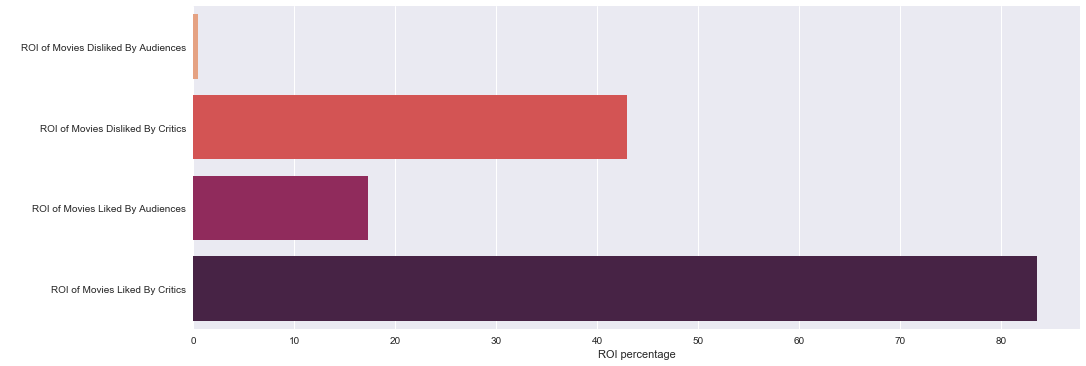

In [71]:
mon = sns.catplot(kind='bar', x=0, y='index', data=criticmondf, height=5, aspect=3, palette='rocket_r')
mon.set(xlabel="ROI percentage", ylabel = " ")  

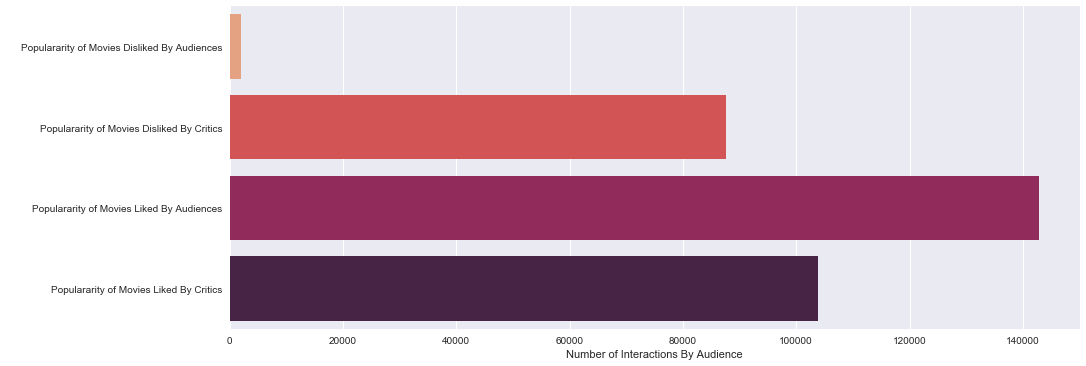

In [72]:
req = sns.catplot(kind='bar', x=0, y='index', data=criticreqdf, height=5, aspect=3, palette='rocket_r')
req.set(xlabel="Number of Interactions By Audience", ylabel = " ")

In [73]:
#reception by audiences means little without critical reviews 